In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter

In [2]:
def create_Blue_Red_cmap(darker=True, log_scale=False, wide_zero=True, reverse=False):
    """
    Create a blue-white-yellow-red colormap for blue-read displacement.
    
    Parameters:
    -----------
    darker : bool, default=True
        Whether to use darker blues and reds at the extremes
    log_scale : bool, default=False
        Whether to use logarithmic spacing for color transitions
    wide_zero : bool, default=True
        Whether to create a wider white section around zero
    reverse : bool, default=False
        Whether to reverse the colormap (red-white-blue instead of blue-white-red)
        
    Returns:
    --------
    matplotlib.colors.LinearSegmentedColormap
        The custom colormap
    """
    # Define the color segments with darker blue and red
    if darker:
        if wide_zero:
            # Version with wider white section around zero (DEFAULT)
            colors = [
                (0.0, (0.0, 0.05, 0.3)),   # Very dark blue
                (0.3, (0.4, 0.6, 0.9)),    # Light blue
                (0.4, (0.85, 0.9, 0.95)),  # Very light blue
                (0.45, (1.0, 1.0, 1.0)),   # White
                (0.5, (1.0, 1.0, 1.0)),    # White (center point)
                (0.55, (1.0, 1.0, 1.0)),   # White
                (0.6, (0.95, 0.9, 0.85)),  # Very light yellow
                (0.7, (1.0, 0.8, 0.3)),    # Yellow
                (0.85, (0.9, 0.3, 0.1)),   # Orange
                (1.0, (0.4, 0.0, 0.0))     # Very dark red
            ]
        else:
            # Standard version with a narrow transition
            colors = [
                (0.0, (0.0, 0.05, 0.3)),   # Very dark blue
                (0.35, (0.4, 0.6, 0.9)),   # Light blue
                (0.48, (0.9, 0.95, 1.0)),  # Very light blue
                (0.5, (1.0, 1.0, 1.0)),    # White
                (0.52, (1.0, 0.95, 0.9)),  # Very light yellow
                (0.65, (1.0, 0.8, 0.3)),   # Yellow
                (0.85, (0.9, 0.3, 0.1)),   # Orange
                (1.0, (0.4, 0.0, 0.0))     # Very dark red
            ]
    else:
        # Lighter version with less contrast
        if wide_zero:
            colors = [
                (0.0, (0.0, 0.3, 0.8)),    # Blue
                (0.3, (0.5, 0.7, 0.9)),    # Light blue
                (0.4, (0.9, 0.95, 1.0)),   # Very light blue
                (0.45, (1.0, 1.0, 1.0)),   # White
                (0.5, (1.0, 1.0, 1.0)),    # White (center point)
                (0.55, (1.0, 1.0, 1.0)),   # White
                (0.6, (1.0, 0.95, 0.9)),   # Very light yellow
                (0.7, (1.0, 0.9, 0.4)),    # Yellow
                (0.85, (1.0, 0.5, 0.2)),   # Orange
                (1.0, (0.8, 0.0, 0.0))     # Red
            ]
        else:
            colors = [
                (0.0, (0.0, 0.3, 0.8)),    # Blue
                (0.35, (0.5, 0.7, 0.9)),   # Light blue
                (0.48, (0.9, 0.95, 1.0)),  # Very light blue
                (0.5, (1.0, 1.0, 1.0)),    # White
                (0.52, (1.0, 0.95, 0.9)),  # Very light yellow
                (0.65, (1.0, 0.9, 0.4)),   # Yellow
                (0.85, (1.0, 0.5, 0.2)),   # Orange
                (1.0, (0.8, 0.0, 0.0))     # Red
            ]
    
    # Apply logarithmic scaling to the color positions if requested
    if log_scale:
        log_colors = []
        for pos, color in colors:
            if pos < 0.5:
                # Scale 0-0.5 range logarithmically, preserving exact points
                if pos == 0:
                    new_pos = 0
                elif pos == 0.5:
                    new_pos = 0.5
                else:
                    # Calculate log-scaled position in 0-0.5 range
                    normalized_pos = pos / 0.5  # Now 0-1
                    log_pos = np.log(1 + 9 * normalized_pos) / np.log(10)  # Log scale 0-1
                    new_pos = log_pos * 0.5  # Back to 0-0.5 range
                log_colors.append((new_pos, color))
            else:
                # Scale 0.5-1 range logarithmically, preserving exact points
                if pos == 0.5:
                    new_pos = 0.5
                elif pos == 1:
                    new_pos = 1
                else:
                    # Calculate log-scaled position in 0.5-1 range
                    normalized_pos = (pos - 0.5) / 0.5  # Now 0-1
                    log_pos = 1 - (np.log(1 + 9 * (1 - normalized_pos)) / np.log(10))  # Inverse log
                    new_pos = 0.5 + (log_pos * 0.5)  # Back to 0.5-1 range
                log_colors.append((new_pos, color))
        
        colors = log_colors
    
    # Create the colormap
    cmap = mcolors.LinearSegmentedColormap.from_list('blue_red_displacement', colors)
    
    # Reverse the colormap if requested
    if reverse:
        cmap = cmap.reversed()
    
    return cmap

In [3]:
def create_realistic_insar_example():
    """Create a realistic InSAR-like displacement example with the different colormaps."""
    
    # Create the four best colormaps for comparison
    cmaps = {
        "Standard": create_Blue_Red_cmap(darker=True, log_scale=False, wide_zero=False),
        "Wide Zero": create_Blue_Red_cmap(darker=True, log_scale=False, wide_zero=True),
        "Logarithmic": create_Blue_Red_cmap(darker=True, log_scale=True, wide_zero=False),
        "Log + Wide Zero": create_Blue_Red_cmap(darker=True, log_scale=True, wide_zero=True)
    }
    
    # Create sample data with synthetic fault
    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-10, 10, 1000)
    X, Y = np.meshgrid(x, y)
    
    # Create a realistic InSAR-like displacement field
    np.random.seed(42)  # For reproducibility
    
    # Main deformation pattern (fault-like feature)
    fault = 4 * np.tanh(X * 1.2)
    
    # Add regional deformation trend
    background = np.sin(X/20) * np.cos(Y/20) * 1.5
    
    # Add noise characteristic of InSAR (speckle + atmospheric)
    noise = np.random.normal(0, 0.15, fault.shape)  # Speckle noise
    smoothed_noise = gaussian_filter(noise, sigma=2) * 2  # Atmospheric noise
    
    # Add coherent small features
    feature1_x, feature1_y = 3, -2  # "Aftershock" location
    feature1 = 2.5 * np.exp(-((X-feature1_x)**2 + (Y-feature1_y)**2) / 5)
    
    feature2_x, feature2_y = -5, 4  # Second feature location
    feature2 = -1.5 * np.exp(-((X-feature2_x)**2 + (Y-feature2_y)**2) / 8)
    
    # Add very small displacement area (to highlight zero range differences)
    small_area_x, small_area_y = 0, -5
    small_area = 0.3 * np.exp(-((X-small_area_x)**2 + (Y-small_area_y)**2) / 15)
    
    # Combine all components
    displacement = fault + background + smoothed_noise + feature1 + feature2 + small_area
    
    # Create speckle in low-coherence areas
    mask = np.abs(displacement) < 0.4
    displacement[mask] += np.random.normal(0, 0.1, size=np.sum(mask))
    
    # Create figure with 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()
    
    # Plot each colormap version
    for i, (title, cmap) in enumerate(cmaps.items()):
        im = axes[i].imshow(displacement, extent=[-10, 10, -10, 10], 
                          cmap=cmap, vmin=-5, vmax=5)
        axes[i].set_title(f"{title} Colormap", fontsize=14)
        axes[i].set_xlabel('Distance (km)')
        
        if i % 2 == 0:  # Left column
            axes[i].set_ylabel('Distance (km)')
        
        # Add colorbar for each subplot
        cbar = fig.colorbar(im, ax=axes[i], pad=0.01)
        cbar.set_label('Displacement (meters)')
        cbar.set_ticks([-5, 0, 5])
        cbar.set_ticklabels(['≤-5', '0', '≥5'])
        
    plt.tight_layout()
    plt.show()
    
    # Return the best colormap based on what matches the original image
    return cmaps["Log + Wide Zero"]

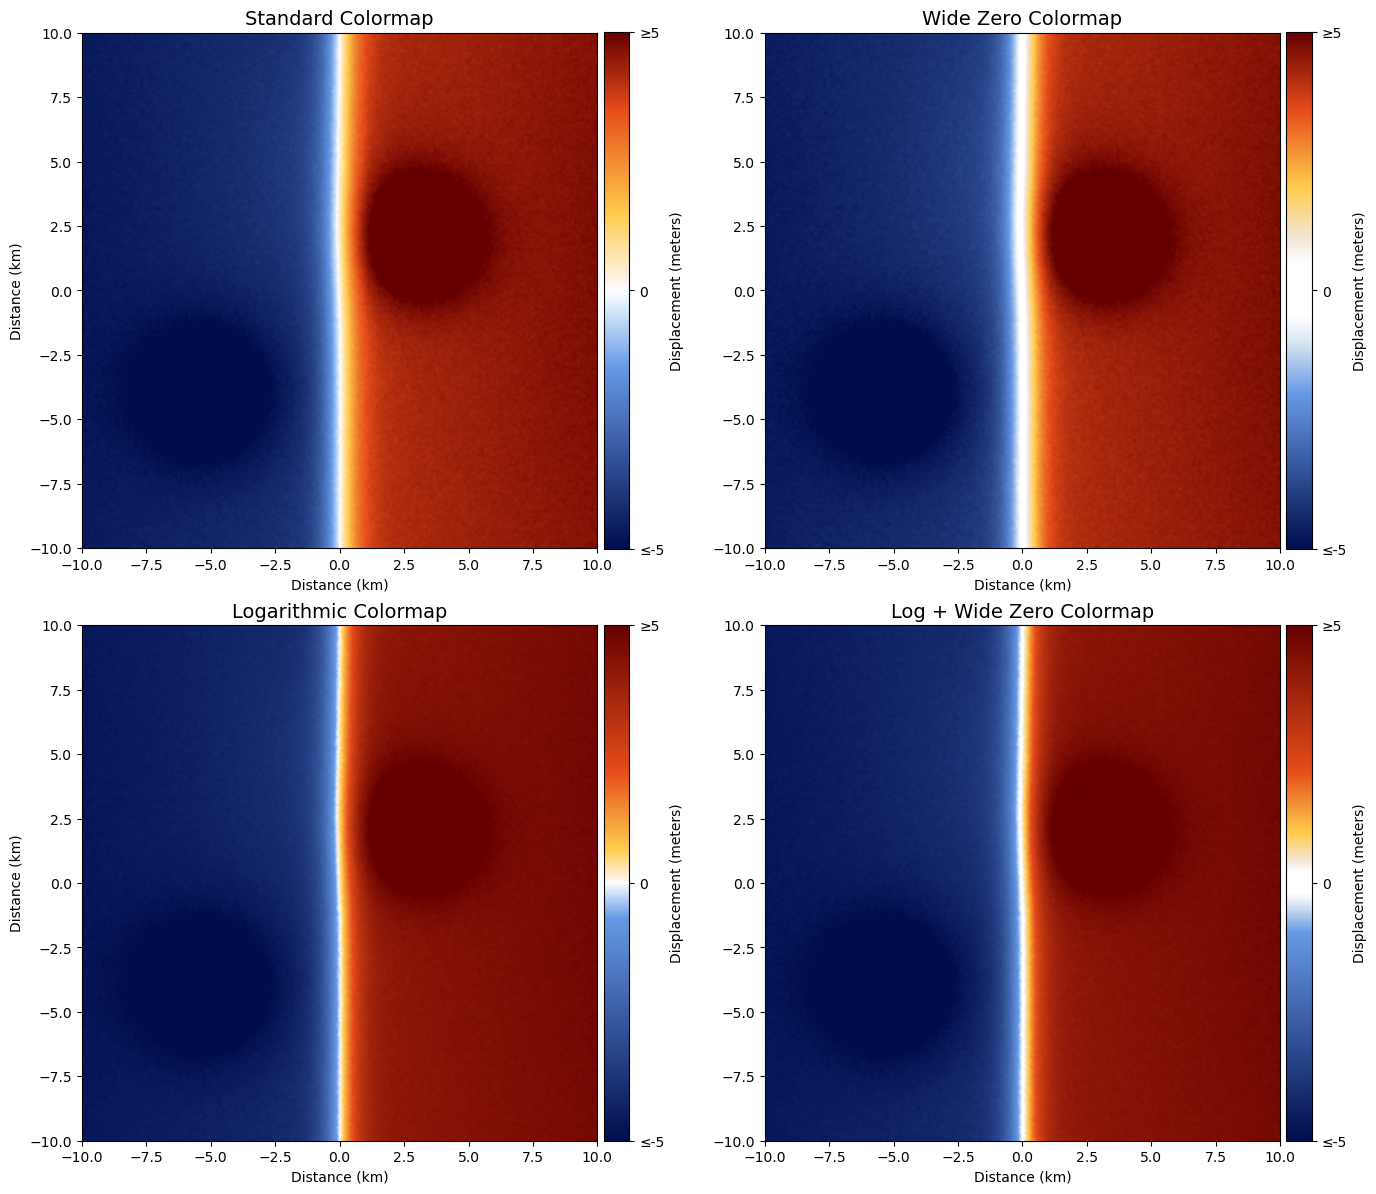

In [4]:
best_cmap = create_realistic_insar_example()